In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sns
import cartopy.crs as ccrs
import pandas as pd

from matplotlib.ticker import FormatStrFormatter
from matplotlib import gridspec, colorbar, colors

C:\Users\ylinh\Anaconda3\envs\nasa\lib\site-packages\pyproj\__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
path = 'C:/Users/ylinh/OneDrive - UW/NASA Sea Ice/data/'
ceres_global = xr.open_dataset(path+'CERES_EBAF_Ed4.1_Subset_200107-200107.nc') # global one month data
ceres = xr.open_dataset(path+'CERES_EBAF_Ed4.1_Subset_200003-202203.nc') # Arctic all-time data
ocn_fraction = np.loadtxt(path+'water_one_degree.dat')
ocn_fraction = np.reshape(ocn_fraction, (180, 360))

lat = np.array(ceres_global['lat'])
lon = np.array(ceres_global['lon'])
lonGrid, latGrid = np.meshgrid(lon, lat)

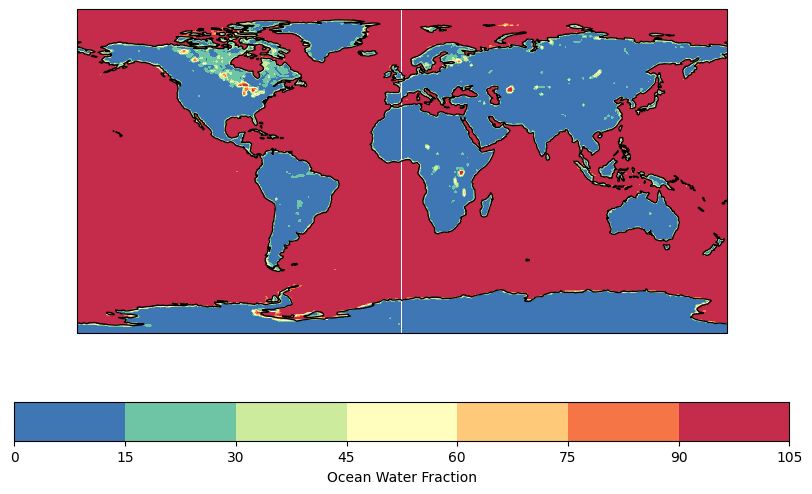

In [3]:
##  Check CERES and water ocean fraction match
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.grid(True)

c1 = ax.contourf(lonGrid, latGrid, np.flip(ocn_fraction,axis=0), cmap='Spectral_r')
fig.colorbar(c1,label='Ocean Water Fraction', orientation='horizontal')
ax.coastlines()

ocn_fraction = np.flip(ocn_fraction,axis=0)

(30, 360)


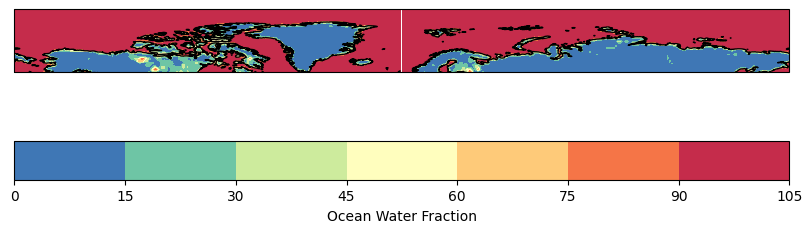

In [4]:
#@ Subset ocean water fraction above 60N
ocn_fraction = ocn_fraction[-30:,:]
print(ocn_fraction.shape)

# Use lat/lon coords from subset CERES Arctic data
lat = np.array(ceres['lat'])
lon = np.array(ceres['lon'])
lonGrid, latGrid = np.meshgrid(lon, lat)

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.grid(True)

c1 = ax.contourf(lonGrid, latGrid, ocn_fraction, cmap='Spectral_r')
fig.colorbar(c1,label='Ocean Water Fraction', orientation='horizontal')
ax.coastlines()

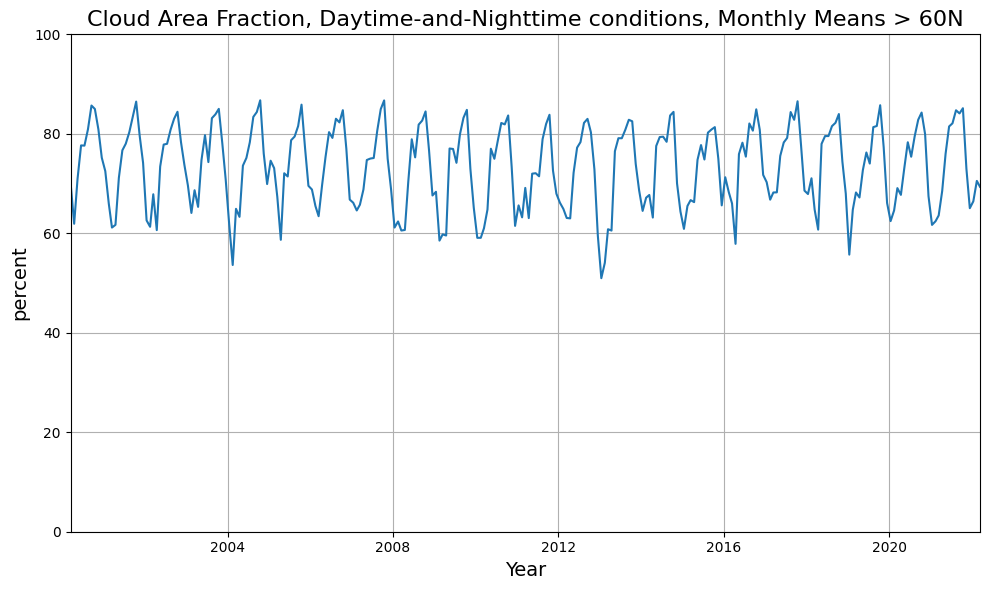

In [5]:
#### Average all data above 60N
var = 'cldarea_total_daynight_mon'
var_mean = np.average(ceres[var], axis=(1,2))

## Plotting
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.set_title(ceres[var].long_name+ ' > 60N', size=16)
ax.set_ylabel(ceres[var].units, size=14)
ax.set_xlabel('Year', size=14)
ax.set_xlim(ceres['time'][0],ceres['time'][-1])
ax.set_ylim(0,100)
plt.plot(ceres['time'], var_mean)
plt.grid()
plt.tight_layout()
plt.show()

(265,)


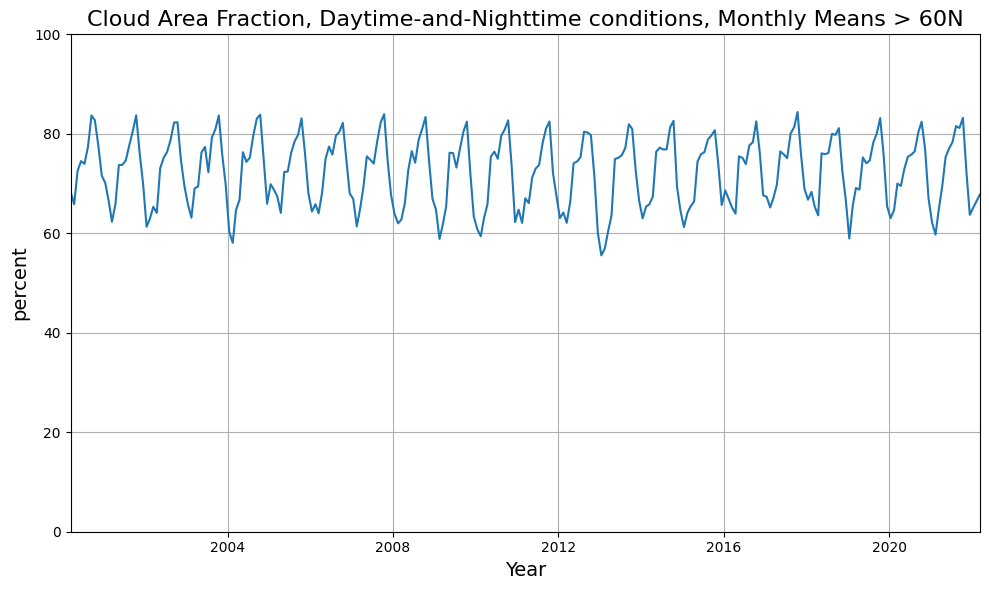

In [6]:
## Average all data above 60N weighted zonally
var = 'cldarea_total_daynight_mon'

weight = np.cos(np.deg2rad(latGrid))
var_mean = np.array([np.average(ceres[var][i], weights=weight) for i in range(len(ceres[var]))])
print(var_mean.shape)

## Plotting
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.set_title(ceres[var].long_name+ ' > 60N', size=16)
ax.set_ylabel(ceres[var].units, size=14)
ax.set_xlabel('Year', size=14)
ax.set_xlim(ceres['time'][0],ceres['time'][-1])
ax.set_ylim(0,100)
plt.plot(ceres['time'], var_mean)
plt.grid()
plt.tight_layout()
plt.show()

In [7]:
latGrid

array([[60.5, 60.5, 60.5, ..., 60.5, 60.5, 60.5],
       [61.5, 61.5, 61.5, ..., 61.5, 61.5, 61.5],
       [62.5, 62.5, 62.5, ..., 62.5, 62.5, 62.5],
       ...,
       [87.5, 87.5, 87.5, ..., 87.5, 87.5, 87.5],
       [88.5, 88.5, 88.5, ..., 88.5, 88.5, 88.5],
       [89.5, 89.5, 89.5, ..., 89.5, 89.5, 89.5]], dtype=float32)

(265,)


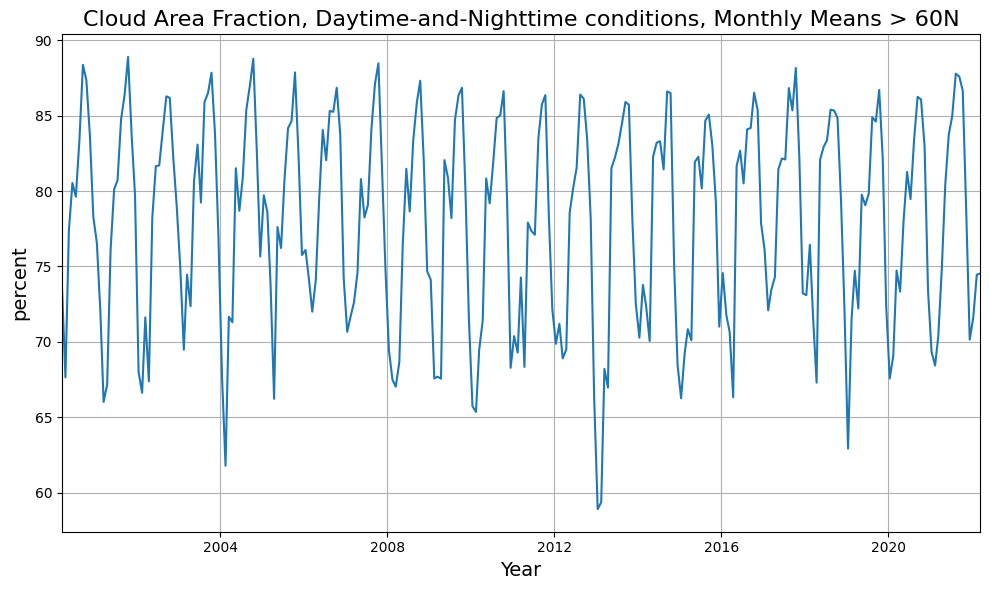

In [8]:
## Average all data above 60N weighted zonally * ocn fraction
var = 'cldarea_total_daynight_mon'

weight = np.cos(np.deg2rad(latGrid))*ocn_fraction
var_mean = np.array([np.average(ceres[var][i], weights=weight) for i in range(len(ceres[var]))])
print(var_mean.shape)

## Plotting
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.set_title(ceres[var].long_name+ ' > 60N', size=16)
ax.set_ylabel(ceres[var].units, size=14)
ax.set_xlabel('Year', size=14)
ax.set_xlim(ceres['time'][0],ceres['time'][-1])
# ax.set_ylim(0,100)
plt.plot(ceres['time'], var_mean)
plt.grid()
plt.tight_layout()
plt.show()

In [9]:
## Average 12 variables above 60N weighted zonally * ocn fraction
var_list = ['toa_sw_all_mon', 
'toa_lw_all_mon', 
'toa_net_all_mon', 
'solar_mon', 
'cldarea_total_daynight_mon', 
'cldpress_total_daynight_mon', 
'cldtau_total_day_mon', 
'cldtemp_total_daynight_mon', 
'sfc_sw_down_all_mon', 
'sfc_sw_up_all_mon', 
'sfc_lw_down_all_mon', 
'sfc_lw_up_all_mon']

weight = np.cos(np.deg2rad(latGrid))*ocn_fraction
var_mean = np.zeros((12, 265))


for i, var in enumerate(var_list):
    var_mean[i] = np.array([np.average(ceres[var][j], weights=weight) for j in range(len(ceres[var]))])
#     print('Average found for ' + var + ' at index ' + str(i))

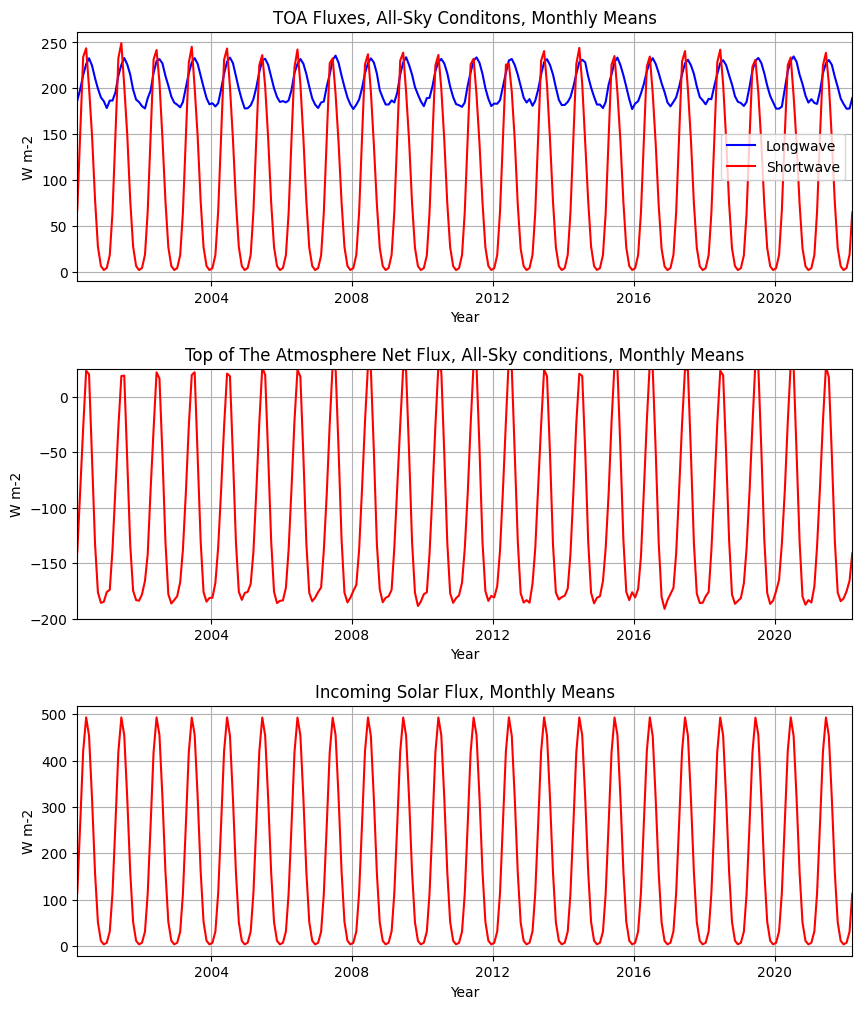

In [10]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib import gridspec, colorbar, colors

var_list_TOA = var_list[0:4]
var_mean_TOA = var_mean[0:4]

fig = plt.figure(figsize=(10, 12))
gs = gridspec.GridSpec(3, 1)
gs.update(hspace=.35, wspace=.15)
ax = []

ax.append(plt.subplot(gs[0]))
ax[0].set_title('TOA Fluxes, All-Sky Conditons, Monthly Means', size=12)
plt.plot(ceres['time'], var_mean_TOA[1],'b', label='Longwave')
plt.plot(ceres['time'], var_mean_TOA[0],'r', label='Shortwave')
plt.grid()
plt.legend()

ax.append(plt.subplot(gs[1]))
ax[1].set_title(ceres[var_list_TOA[2]].long_name, size=12)
plt.plot(ceres['time'], var_mean_TOA[2],'r')
plt.grid()

ax.append(plt.subplot(gs[2]))
ax[2].set_title(ceres[var_list_TOA[3]].long_name, size=12)
plt.plot(ceres['time'], var_mean_TOA[3],'r')
plt.grid()
    
for i in range(len(ax)):
    ax[i].set_ylabel(ceres[var_list_TOA[i]].units, size=10)
    ax[i].set_xlabel('Year', size=10)
    ax[i].set_xlim(ceres['time'][0],ceres['time'][-1])
    
    if i == 1:
        ax[i].set_ylim(-200, 25)
#     elif i == 0:
#         ax[i].set_ylim(0, 325)
    else:
        pass
    
    ax[i].tick_params(axis='both', labelsize=10) 

# plt.savefig('CERES_TOA_mean.png')

In [11]:
path = 'C:/Users/ylinh/OneDrive - UW/NASA Sea Ice/data/'

import tarfile
# Open and extract NSIDC seaice area data
icearea = tarfile.open(path+'icearea.tar', mode='r')
icearea.extractall()

filenames = icearea.getnames()
filenames.remove(filenames[0])
filenames.sort()
filenames

seaice_area = []
dates = pd.date_range(start='1/15/2000', end='12/15/2017', freq='2SM')
for i, file in enumerate(filenames):
    seaice_area = np.append(seaice_area, np.loadtxt(path+file, usecols=1))
#     print('Reading '+str(file))
seaice_area = pd.DataFrame(seaice_area, columns=['seaice_area'], index=dates)
# seaice_area

# confirm total area is calculated correctly
# total_area = np.sum((25 * 25) * (ocn_fraction) * np.cos(np.deg2rad(latGrid))) * (10**-6) # millions of km 


# print('Total area of all water above 60N: '+str(total_area)+' millions of km')
# seaice_frac = seaice_area / total_area

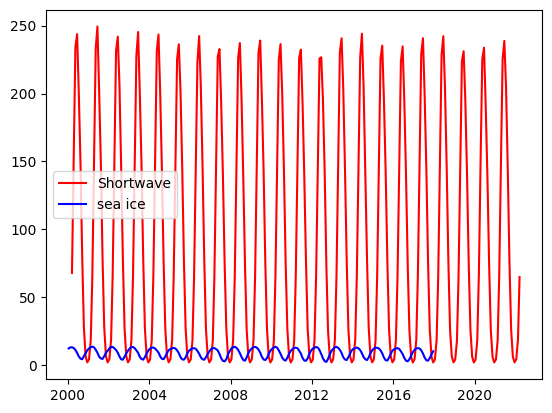

In [12]:
plt.plot(ceres['time'], var_mean_TOA[0],'r', label='Shortwave')
plt.plot(seaice_area['seaice_area'],'b', label='sea ice')
plt.legend()

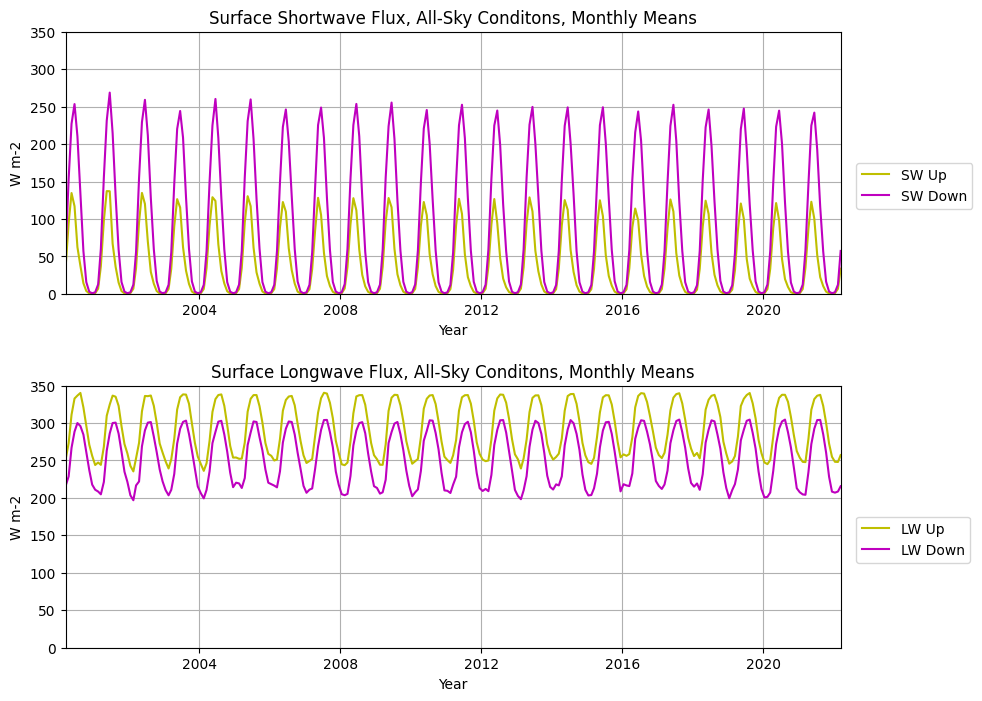

In [13]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib import gridspec, colorbar, colors

var_list_sfc = var_list[8:12]
var_mean_sfc = var_mean[8:12]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 1)
gs.update(hspace=.35, wspace=.15)
ax = []

ax.append(plt.subplot(gs[0]))
ax[0].set_title('Surface Shortwave Flux, All-Sky Conditons, Monthly Means', size=12)
plt.plot(ceres['time'], var_mean_sfc[1],'y', label='SW Up')
plt.plot(ceres['time'], var_mean_sfc[0],'m', label='SW Down')
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 0.5), borderaxespad=0)

ax.append(plt.subplot(gs[1]))
ax[1].set_title('Surface Longwave Flux, All-Sky Conditons, Monthly Means', size=12)
plt.plot(ceres['time'], var_mean_sfc[3],'y', label='LW Up')
plt.plot(ceres['time'], var_mean_sfc[2],'m', label='LW Down')
plt.grid()
plt.legend(bbox_to_anchor=(1.167, 0.5), borderaxespad=0)

for i in range(len(ax)):
    ax[i].set_xlabel('Year', size=10)
    ax[i].set_ylabel(ceres[var_list_sfc[i]].units, size=10)
    ax[i].set_xlim(ceres['time'][0],ceres['time'][-1])
    ax[i].set_ylim(0,350)
    ax[i].tick_params(axis='both', labelsize=10) 
    
# plt.savefig('CERES_sfc_mean.png')

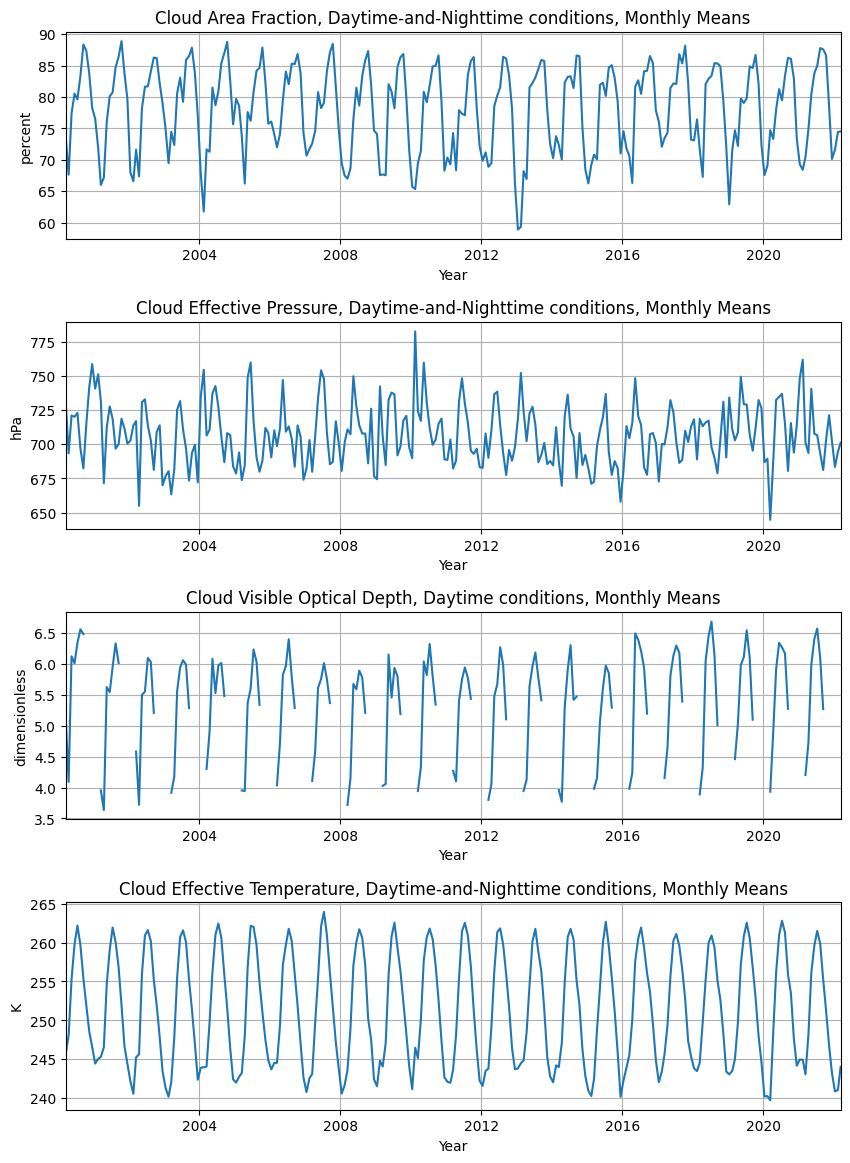

In [14]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib import gridspec, colorbar, colors

var_list_cloud = var_list[4:8]
var_mean_cloud = var_mean[4:8]

fig = plt.figure(figsize=(10, 14))
gs = gridspec.GridSpec(4, 1)
gs.update(hspace=.4, wspace=.15)
ax = []

for i, var in enumerate(var_list_cloud):
    ax.append(plt.subplot(gs[i]))
    ax[i].set_title(ceres[var].long_name, size=12)
    ax[i].set_ylabel(ceres[var].units, size=10)
    ax[i].set_xlabel('Year', size=10)
    ax[i].set_xlim(ceres['time'][0],ceres['time'][-1])
#     ax[i].set_ylim(1000,15)
    ax[i].tick_params(axis='both', labelsize=10) 
    plt.plot(ceres['time'], var_mean_cloud[i])
    plt.grid()
    
# plt.savefig('CERES_cloud_mean.png')

# Deasonalize

In [15]:
## Average 12 variables above 60N weighted zonally * ocn fraction
var_list = ['toa_sw_all_mon', 
'toa_lw_all_mon', 
'toa_net_all_mon', 
'solar_mon', 
'cldarea_total_daynight_mon', 
'cldpress_total_daynight_mon', 
'cldtau_total_day_mon', 
'cldtemp_total_daynight_mon', 
'sfc_sw_down_all_mon', 
'sfc_sw_up_all_mon', 
'sfc_lw_down_all_mon', 
'sfc_lw_up_all_mon']

weight = np.cos(np.deg2rad(latGrid))*ocn_fraction
var_mean = np.zeros((12, 265))
months = ceres.groupby("time.month").groups

for i, var in enumerate(var_list):
    month_mean = np.zeros((12,23))
    for j, month in enumerate(months):
#         print('Averaging month '+str(month)+' in '+str(var))
        
        ceres_month = ceres.isel(time=months[month])
        weighted_mean = np.array([np.average(ceres_month[var][n], weights=weight) for n in range(len(ceres_month[var]))])
        alltime_mean = np.average(weighted_mean)
        deseason = weighted_mean - alltime_mean
        
        if len(deseason)==22:
            deseason = np.append(deseason, [np.inf])
            # I do this for two reasons: 
            # one, because we have 23 years of data for March but 22 years of data for all other months
            # so I use inf here so that the deseason array can be inserted into month_mean array
            # two, this inf value will be deleted and optical depth has nan values so an inf value must be used
        month_mean[j] = deseason
        
    month_mean = month_mean.flatten('F') # needs 'F', don't understand why but look at cloud optical depth when 'C' is called
    month_mean = month_mean[~np.isinf(month_mean)]
    var_mean[i] = month_mean
#     print('Average found for ' + var + ' at index ' + str(i))

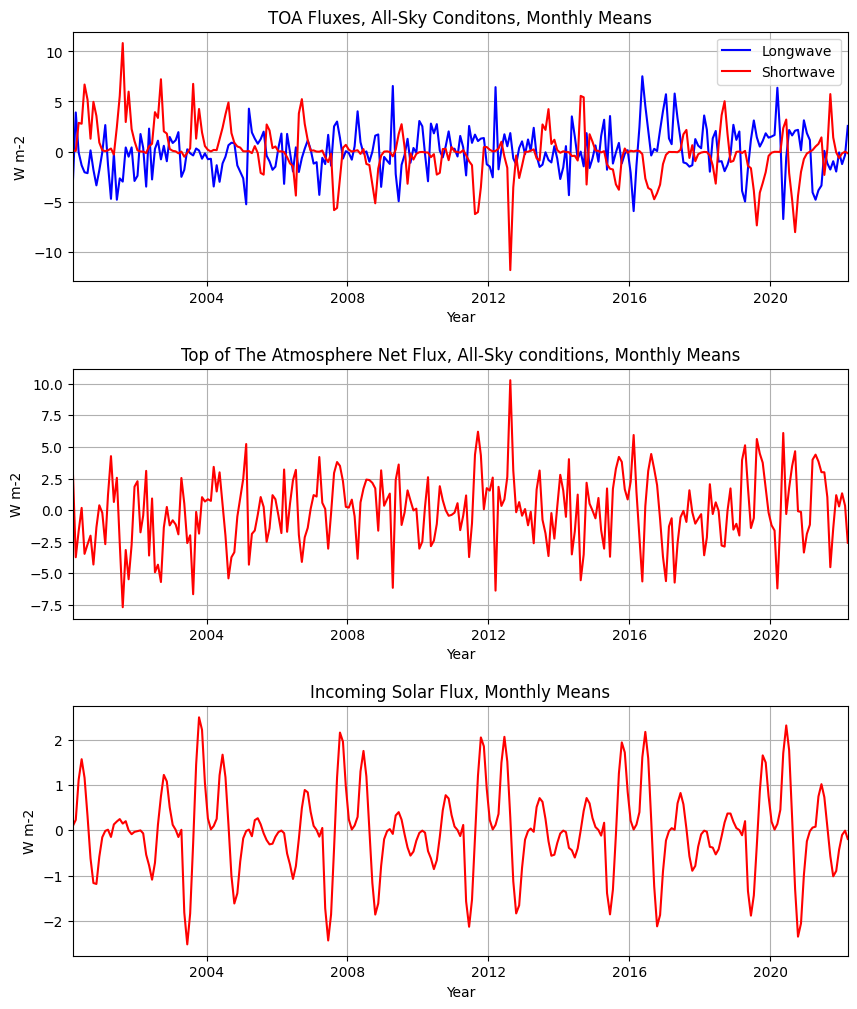

In [16]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib import gridspec, colorbar, colors

var_list_TOA = var_list[0:4]
var_mean_TOA = var_mean[0:4]

fig = plt.figure(figsize=(10, 12))
gs = gridspec.GridSpec(3, 1)
gs.update(hspace=.35, wspace=.15)
ax = []

ax.append(plt.subplot(gs[0]))
ax[0].set_title('TOA Fluxes, All-Sky Conditons, Monthly Means', size=12)
plt.plot(ceres['time'], var_mean_TOA[1],'b', label='Longwave')
plt.plot(ceres['time'], var_mean_TOA[0],'r', label='Shortwave')
plt.grid()
plt.legend()

ax.append(plt.subplot(gs[1]))
ax[1].set_title(ceres[var_list_TOA[2]].long_name, size=12)
plt.plot(ceres['time'], var_mean_TOA[2],'r')
plt.grid()

ax.append(plt.subplot(gs[2]))
ax[2].set_title(ceres[var_list_TOA[3]].long_name, size=12)
plt.plot(ceres['time'], var_mean_TOA[3],'r')
plt.grid()
    
for i in range(len(ax)):
    ax[i].set_ylabel(ceres[var_list_TOA[i]].units, size=10)
    ax[i].set_xlabel('Year', size=10)
    ax[i].set_xlim(ceres['time'][0],ceres['time'][-1])
    
#     if i == 1:
#         ax[i].set_ylim(-200, 25)
#     elif i == 0:
#         ax[i].set_ylim(0, 325)
#     else:
#         pass
    
    ax[i].tick_params(axis='both', labelsize=10) 

# plt.savefig('CERES_TOA_mean.png')

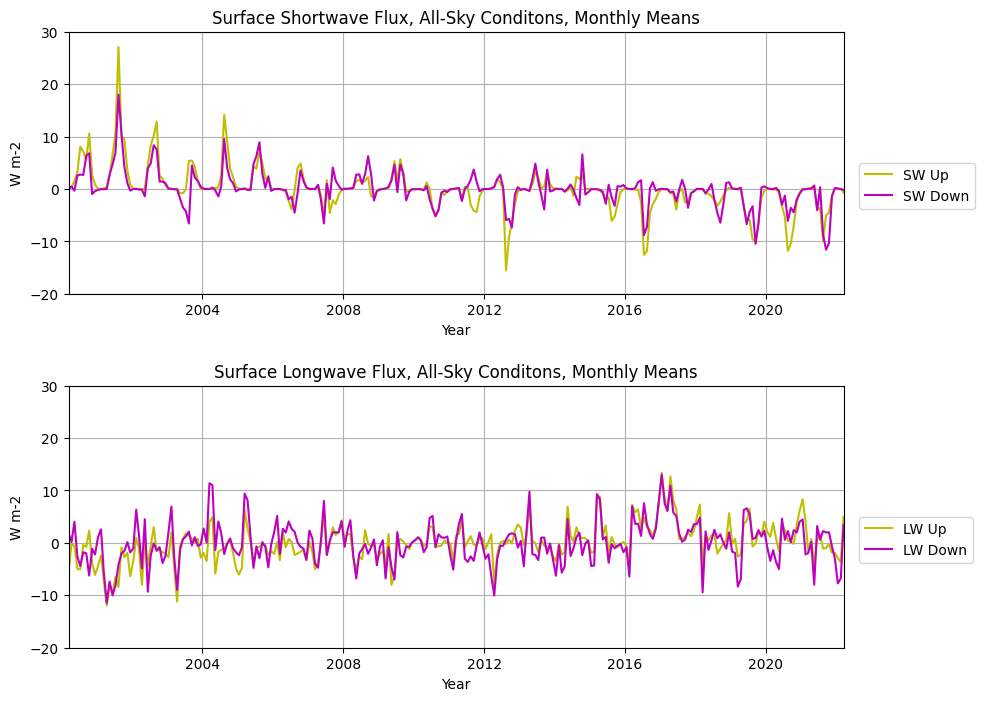

In [17]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib import gridspec, colorbar, colors

var_list_sfc = var_list[8:12]
var_mean_sfc = var_mean[8:12]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 1)
gs.update(hspace=.35, wspace=.15)
ax = []

ax.append(plt.subplot(gs[0]))
ax[0].set_title('Surface Shortwave Flux, All-Sky Conditons, Monthly Means', size=12)
plt.plot(ceres['time'], var_mean_sfc[1],'y', label='SW Up')
plt.plot(ceres['time'], var_mean_sfc[0],'m', label='SW Down')
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 0.5), borderaxespad=0)

ax.append(plt.subplot(gs[1]))
ax[1].set_title('Surface Longwave Flux, All-Sky Conditons, Monthly Means', size=12)
plt.plot(ceres['time'], var_mean_sfc[3],'y', label='LW Up')
plt.plot(ceres['time'], var_mean_sfc[2],'m', label='LW Down')
plt.grid()
plt.legend(bbox_to_anchor=(1.167, 0.5), borderaxespad=0)

for i in range(len(ax)):
    ax[i].set_xlabel('Year', size=10)
    ax[i].set_ylabel(ceres[var_list_sfc[i]].units, size=10)
    ax[i].set_xlim(ceres['time'][0],ceres['time'][-1])
    ax[i].set_ylim(-20,30)
    ax[i].tick_params(axis='both', labelsize=10) 
    
# plt.savefig('CERES_sfc_mean.png')

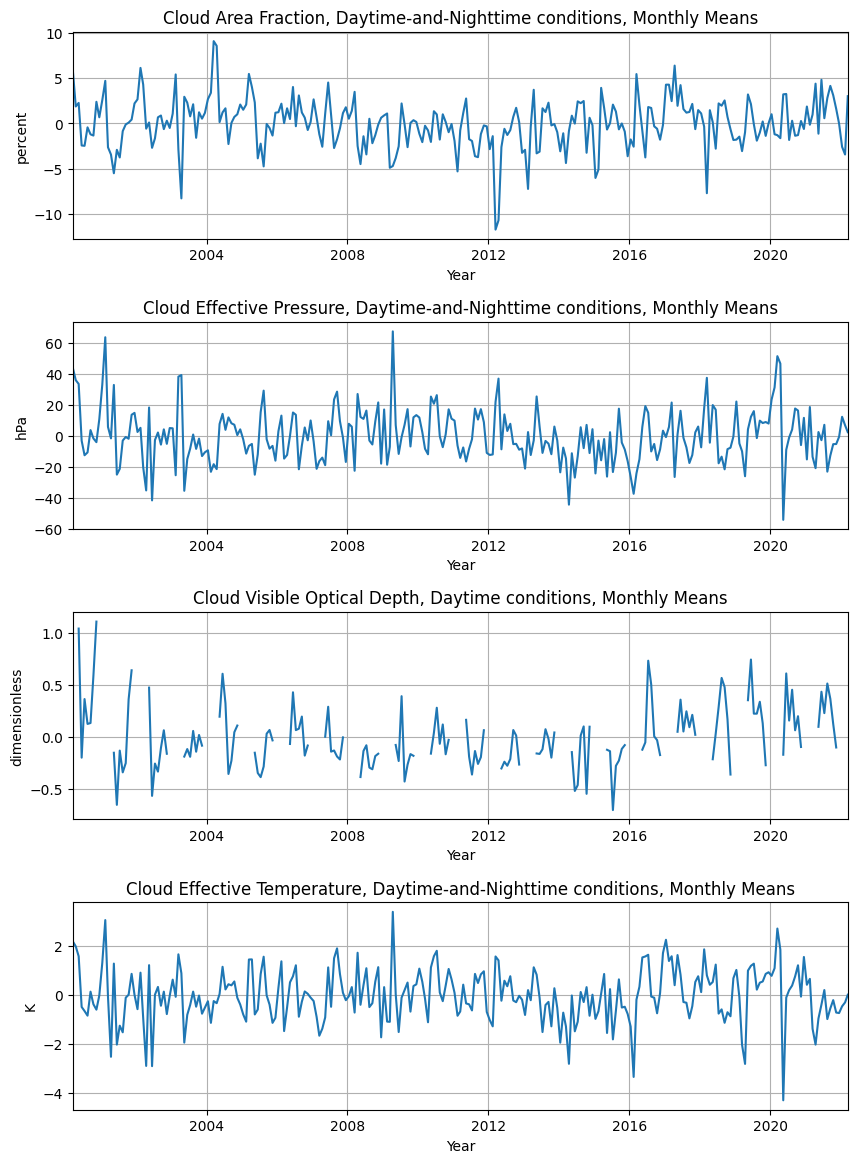

In [18]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib import gridspec, colorbar, colors

var_list_cloud = var_list[4:8]
var_mean_cloud = var_mean[4:8]

fig = plt.figure(figsize=(10, 14))
gs = gridspec.GridSpec(4, 1)
gs.update(hspace=.4, wspace=.15)
ax = []

for i, var in enumerate(var_list_cloud):
    ax.append(plt.subplot(gs[i]))
    ax[i].set_title(ceres[var].long_name, size=12)
    ax[i].set_ylabel(ceres[var].units, size=10)
    ax[i].set_xlabel('Year', size=10)
    ax[i].set_xlim(ceres['time'][0],ceres['time'][-1])
#     ax[i].set_ylim(1000,15)
    ax[i].tick_params(axis='both', labelsize=10) 
    plt.plot(ceres['time'], var_mean_cloud[i])
    plt.grid()
    
# plt.savefig('CERES_cloud_mean.png')

In [19]:
df = pd.DataFrame(var_mean.transpose(), columns=var_list, index=ceres['time'].to_numpy())
df

,toa_sw_all_mon,toa_lw_all_mon,toa_net_all_mon,solar_mon,cldarea_total_daynight_mon,cldpress_total_daynight_mon,cldtau_total_day_mon,cldtemp_total_daynight_mon,sfc_sw_down_all_mon,sfc_sw_up_all_mon,sfc_lw_down_all_mon,sfc_lw_up_all_mon
2000-03-15,0.128033,-3.313942,3.278047,0.092523,5.927741,43.875218,NaN,2.195308,-0.035321,0.013297,1.974970,-5.966164
2000-04-15,0.053530,3.903000,-3.725353,0.230829,1.869407,35.809090,NaN,1.986593,0.478858,0.395311,0.148424,-0.077547
2000-05-15,2.864582,-0.096217,-1.649201,1.119468,2.262250,33.398660,1.045275,1.585863,-0.334115,1.467258,4.016563,-0.629854
2000-06-15,2.773715,-1.380170,0.179844,1.571762,-2.433165,-3.170151,-0.199801,-0.482298,2.576409,3.238378,-2.648275,-4.992049
2000-07-15,6.691179,-2.072646,-3.458562,1.161852,-2.471276,-12.576936,0.365407,-0.648878,2.748192,8.078965,-4.414184,-5.058241
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-15,-0.088383,-1.998295,1.188915,-0.898188,1.606154,-5.337468,-0.101659,-0.711448,-1.408384,-1.150317,-0.669864,-1.887989
2021-12-15,-0.632264,-0.087410,0.291419,-0.427928,-0.028323,-0.693163,NaN,-0.730235,0.198025,-0.038228,-2.934787,-1.881984
2022-01-15,-0.185181,-1.253781,1.334679,-0.102379,-2.584522,12.210511,NaN,-0.456127,0.093908,0.051802,-7.729143,-2.880319
2022-02-15,-0.009153,-0.345600,0.347185,-0.007132,-3.430175,6.743698,NaN,-0.297073,-0.008585,-0.013834,-6.779451,-3.693471


In [20]:
df.to_pickle('weighted_deseasonalized_avg_CERES')

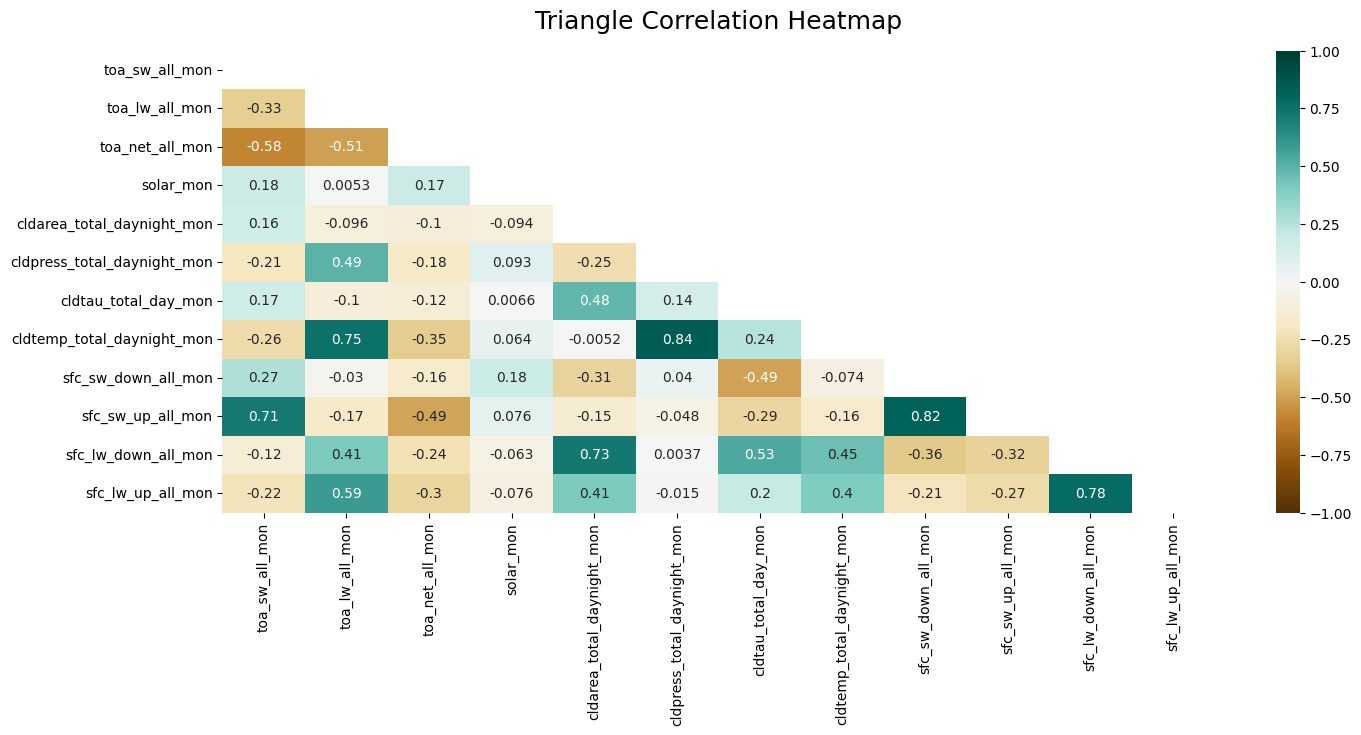

In [21]:
df.corr()

# plt.figure(figsize=(16, 6))
# heatmap = sns.heatmap(ceres_df[var_list_cloud].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

NameError: name 'dd' is not defined

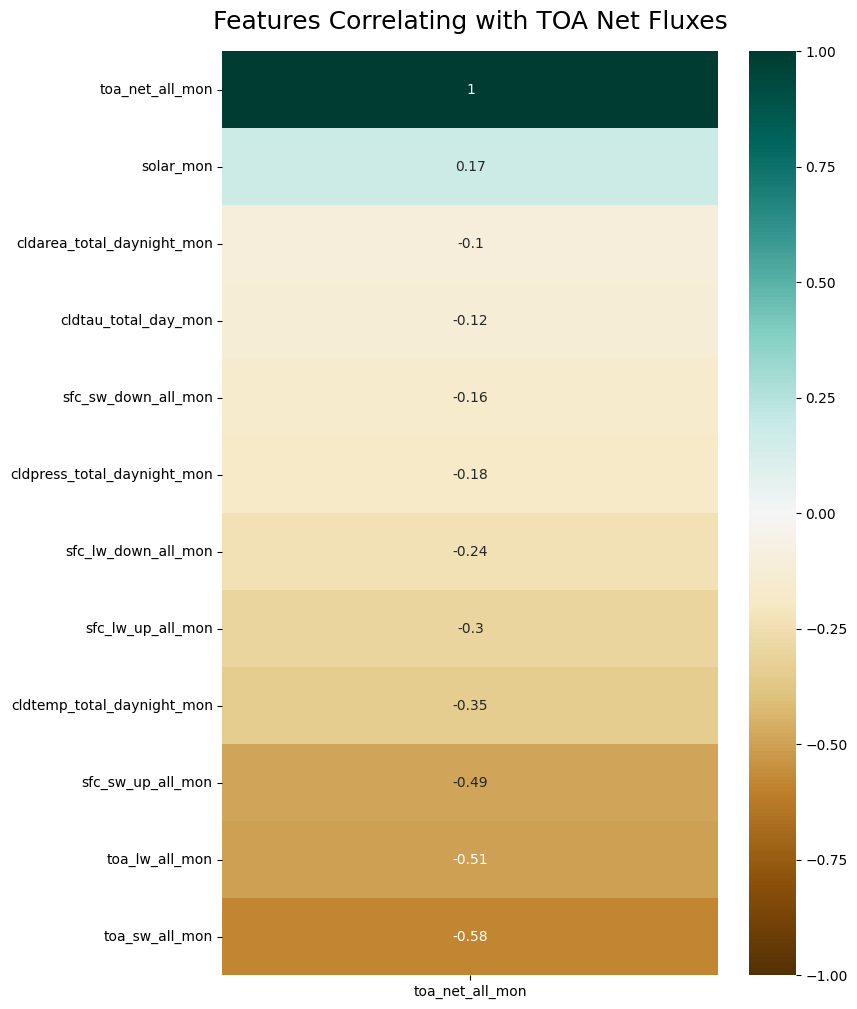

In [22]:
df.corr()[['toa_net_all_mon']].sort_values(by='toa_net_all_mon', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['toa_net_all_mon']].sort_values(by='toa_net_all_mon', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with TOA Net Fluxes', fontdict={'fontsize':18}, pad=16);dd